<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6

In [1]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘numDeriv’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘abind’, ‘tensorA’, ‘distributional’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘V8’





shape (NA -> 1.4.6.1) [CRAN]


Installing 1 packages: shape

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpRNTF2s/remotes6c4256bfb4b/rmcelreath-rethinking-cbcb8ba/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




## Easy

### 6E1-6E2
#### Questions
1.   List three mechanisms by which multiple regression can produce false inferences about causal effects.
2.  For one of the mechanisms in the previous problem, provide an example of your choice, perhaps from your own research.

#### Answer
The mechanisms discussed in Chapter 6 were:
*   **Multicollinearity:**  When (sets of) predictor variables are strongly associated to the point of nearly collinear.  Sometimes, this can cause instability in the model--making it difficult for the algorithm to converge on an estimate.  But even with convergence, the posterior will be hard to interpret.  This is because the model's job is attribute information among explanatory variables, but multicollinearity means that the collinear explanatory variables share information; the model, then, must be uncertain how to attribute information among the collinear variables.  The result is often very wide credibility intervals for the collinear parameters.  

   An example of multicollinearity might be modeling test outcomes on students an including as explanatory variables *amount of time slept night before exam* and *amount of time spent studying on night before exam*.  The could be collinear since time spent sleeping/studying could reduce time spent stuyding/sleeping.
*   **Omitted-Variable Bias:** This occurs when an explanatory variable is omitted from the regression.  Just because the regression omits an important explanatory variable does not change the fact that that explanatory variable is important in determining the outcome.  Say we model $y_i = \alpha + \beta x + \epsilon$, but we have unintentionally omitted the explanatory variable $w$.  The influence of $w$ on $y$ is still present in the data, we're just not recognizing it.  Where does that influence go in our regression?  If it is completely orthogonal (unrelated) to $x$, then the influence of $w$ gets *sponged up* by $\epsilon$.  But to the extent that $w$ and $x$ are collinear (associated), the influence of $w$ on $y$ is also sponged up $\beta$.  Thus, even though we will think $\beta$ represents the effect of $x$ on $y$, it will actually additionally represent part of the effect of $w$ on $y$.  

   For example, if an important explantory variable in student test performance is *quality of teaching*, omitting it will increase the error in the posterior and skew the estimate for *previous night's sleep* insofar as quality of teaching is associated with previous night's sleep (for example, good teaching may alleviate the need for last minute cramming).
*   **Post-Treatment Bias:** Look at the DAG X -> M -> Y; imagine that $X$ is a treatment that acts on $Y$ via $M$.  Conditioning on a *mediator* variable $M$ will *screen off* the causal effect of $X$ on $Y$.  $X$ affects $Y$ via $M$; including a variable in regression is akin to holding its value constant; thus, including $M$ is akin to holding its value constant, but its value must flucuate with $X$ in order to cause $Y$ to also change.  

   Here's an example.  Suppose that we study a drug $X$ that is hypothesized to reduce heart attack $Y$.  It works via reducing blood pressure $M$.  If we regress $Y$ on both $X$ and $M$, the apparent effect of the drug $X$ will be eliminated.
*   **Collider Bias/Selection Bias:** The text discusses 3 main causal motiffs.
   *   *Mediators* or *Pipes*:  X -> M -> Y
   *   *Forks*: X <- F -> Y
   *   *Colliders*: X -> C <- Y

   The collider is unique among these because, whereas conditioning on the non-X/Y variable in mediators (M) or forks (F) blocks the flow of information between X and Y, conditioning on C opens informational flow.  Informational flow is detected as association in regression; if we're not aware of the effects on informational flow from conditioning on a collider, the induced association between X and Y can be falsely interpretted as a causal effect of X on Y.  This is collider bias.  Collider bias can also be called "selection bias" because the conditioning on a common cause of X and Y *selects* certain observations that will bias inference.  
   
  An example.  Say the true state of the world is that previous-night's studying does NOT affect test performance, but it does affect students' confidence (Study -> Confidence).  Teacher Quality also affects confidence; unlike previous-night's studying, teacher quality DOES affect test performance (Confidence <- Teacher -> Test).  Altogether, our DAG looks like Study -> Confidence <- Teacher -> Test (we see that Confidence is a collider between Study and Teacher).  Now we set up our regression; for whatever reason, we hypothesize that Study and Confidence cause Test performance, but fail to consider Teacher.  Even though neither Study nor Confidence affect test performance, conditioning on Confidence opens the collider between Study and Teacher.  The result: the regression will reveal an effect of Study on Test even though this does not exist in reality.
*   **Confounding:** Confounding is a consequence of the *Fork* motif; X and Y are both common consequences of F.  Even though X does not affect Y (or vice versa), they are associated in the data.  We eliminate this by conditioning on F.

   Say we regress test performance only on Confidence for the DAG above (Study -> Confidence <- Teacher -> Test).  There will be an association between Confidence and Test because both are consequences of Teacher.  We must additionally condition on Teacher to prevent this.

### 6E3
#### Question
List the four elemental confounds.  Can you explain the conditional dependencies of each?

#### Answer
| Relationship   | Causal Structure                           | Conditional Independence           |
|----------------|--------------------------------------------|-----------------------------------|
| Fork           | $ X \leftarrow F \rightarrow Y $          | $ X \perp Y | F $                 |
| Pipe/Mediator  | $ X \rightarrow M \rightarrow Y $         | $ X \perp Y | M $                 |
| Collider       | $ X \rightarrow C \leftarrow Y $          | $ X \not\perp Y | C $             |
| Descendant     | An effect of another variable. | Conditioning on a descendant has similar effects to conditioning on its cause.

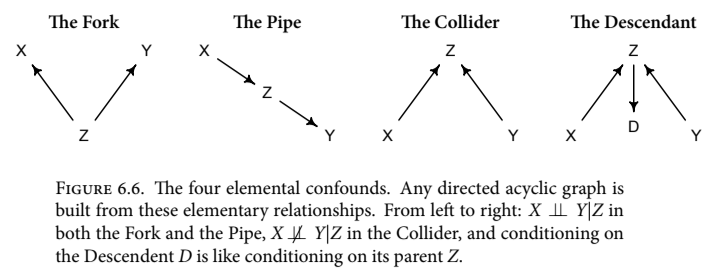

If you want to learn more about causal inference, DAGs, and the structures, you might want to read [Causal Inference in Statistics, A Primer](https://www.amazon.com/Causal-Inference-Statistics-Judea-Pearl/dp/1119186846/ref=sr_1_6?crid=20JMY35NM4KTE&dib=eyJ2IjoiMSJ9.5C96FL9QzT0Lor4-NksVSMOKm0mLiYsNMSLCvgkuMvVW8Zci32VXNUU-a9BKTGgK4sXFT0WJbXjTzKYEZpLguT1nVpqqKOuGbVGETv0mdh5R534cx1AzBiRAAw6lznqF992TUKmrWb6k0JDAF7ituRq2cieJY8b31UFIBeIAq7Dt0pN_rHA9pTUqqbjNRdx-fb1QGSvS9Ti0TpsF8FsprrDQPahlaLy6S7mSxlcMAzCRMmZgXUhTBu8h_Q7cBRFO_Hb9pCqwNY03mKTaUHmw8yiefQT1uJyIxbxB31HZS0Q.9prpm7TKO6S9DRVsWK_cSTCg6FJbAxpxp6UDNlplVwI&dib_tag=se&keywords=Causal+inference&qid=1708349476&sprefix=causal+inferenc%2Caps%2C421&sr=8-6)

### 6E4
#### Question
How is a biased sample like conditioning on a collider?  Think of the example at the open of the chapter.

#### Answer
Recall that colliders X -> C <- Y are causal structures where the C is a consequence of both X and Y.  In colliders, X and Y begin as being independent of one another ($X \perp Y$), but become dependent when conditioning on C ($X \perp Y | C$).

This can be a little perplexing.  A simple example from Judea Pearl might help.  Imagaine X and Y are the outcomes of flipping two separate coins.  If we track 1,000 flips from each coin and look for an association between their outcomes, we should find none.  In other words, $X \perp Y$.  But now additionally consider a bell that rings whenever both coins land heads up; call the bell data C.  So now we have 1,000 datapoints for X, Y, and C.  If we take from that dataset only instances in which C = *ring*, which is like "conditioning on C", do we expect that X and Y will still be independent?  Of course not, we have **selected** cases where X and Y happen to be heads.  By conditioning on the collider, we have induced an association between X and Y.  This is the basic mechanism of the collider.

Notice how I used the term "**selected**" to describe this; we *selected* certain cases that caused the appearance of a relationship between otherwise independent variables.  But how does this work in more realistic situations.  As the question requests, let's take the publishing-bias example from the beginning of the chapter.

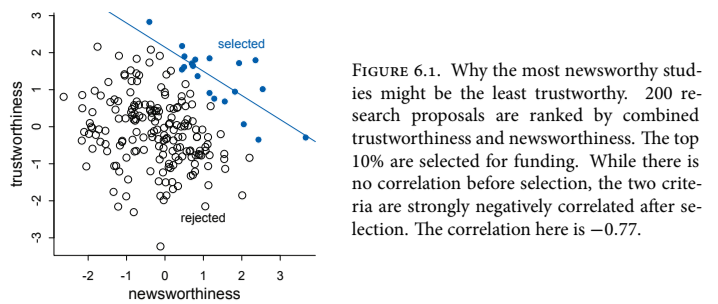

Studies are funded based on a combination of trustworthiness and newsworthiness of the proposals.  Let's imagine regressing trustworthiness on newsworthiness like

> $T = \alpha + \beta N$.  

This implies a DAG like

> $N \rightarrow T$.  

However, the actual DAG is

> $N \rightarrow P \leftarrow T$,

where $P$ is *published*.  If we added $P$ to our regression,

> $T = \alpha + \beta_N N + \beta_P P$,

we would be conditioning on a collider and therefore induce an association between $T$ and $N$ that we could mistake as "Greater newsworthiness in a proposal **causes** lesser trustworthiness in that proposal".  

You could think "Phew, glad we excluded $P$ from our regression".  Unfortunately, we haven't.  Our data is only studies that have been published ($P = published$).  The mechanism by which we acquired our data selected proposal that show an apparent relationship between $T$ and $N$; only funded studies get published.

## Medium

### 6M1
#### Question
Modify the DAG on page 186

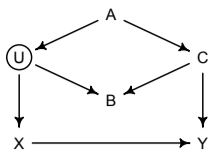

to include the variable V, an unobserved cause of C and Y: C ← V → Y. Reanalyze the DAG. How many paths connect X to Y? Which must be closed? Which variables should you condition on now?

#### Answer
Let's start by creating the DAG described.

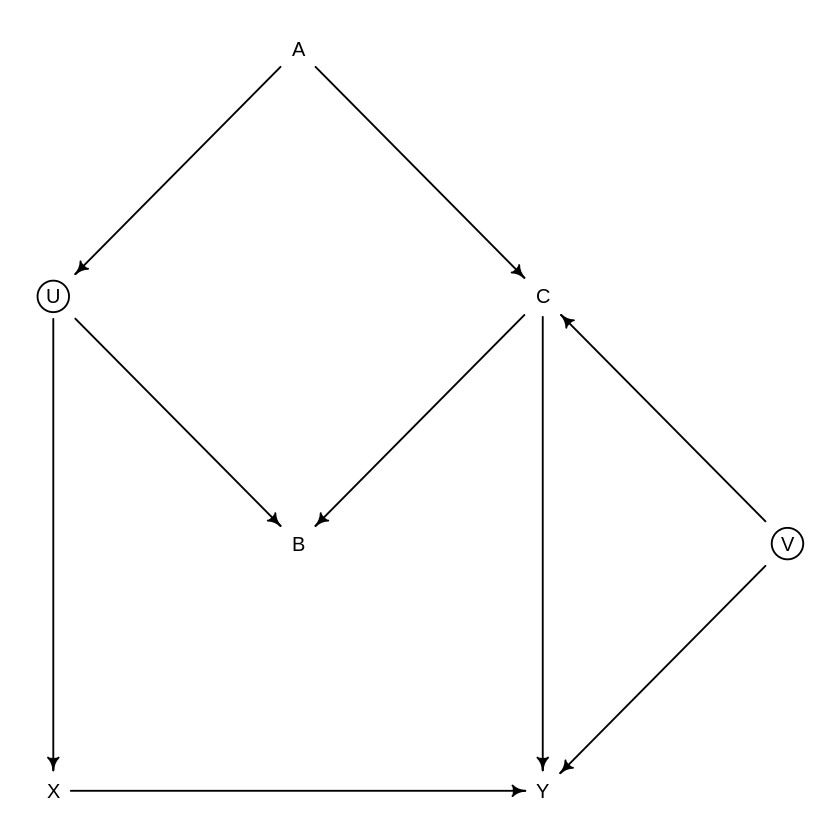

In [ ]:
library(dagitty)

dag_6.1_mod <- dagitty( "dag{U [unobserved]
                            X -> Y
                            X <- U <- A -> C -> Y
                            U -> B <- C

                            V [unobserved]
                            C <- V -> Y}")
coordinates(dag_6.1_mod) <- list(x=c(A=2, B=2, C=3, U=1, V=4, X=1, Y=3),
                                 y=c(A=1, B=3, C=2, U=2, V=3, X=4, Y=4))
drawdag(dag_6.1_mod)

By adding V, in our consideration of the paths from X to Y, we've turned C into a collider; conditioning on C could open a non-causal path from X to Y.

Let's count the number of open and closed paths from X to Y
*   X -> Y (direct causal path)
*   X <- U <- A -> C -> Y (open non-causal path)
*   X <- U <- A -> C <- V -> Y (non-causal path, blocked by collider C)
*   X <- U -> B <- C -> Y (non-causal path, blocked by collider B)
*   X <- U -> B <- C <- V -> Y (non-causal path, blocked by collider B)

So we have 5 total paths, only 2 of which are open: the direct causal path, X -> Y, and an open non-causal path, X <- U <- A -> C -> Y.  If we want to estimate the causal effect of X on Y, we need to close down this second path.  On which variables (other than X) should we condition on to accomplish this?

It would be nice to condition on U; that would block the path.  Unfortunately, we can't measure U (since it unobserved), so we can't condition on U.

Conditioning on A would block this path.

Before considering V, we could have conditioned on C to block the path.  But now, C is a collider between A and V; conditioning on it opens the 3rd path (X <- U <- A -> C <- V -> Y).

So it looks like we should condition on A.  That means our regression would look something like

> $\hat{y}_i = \alpha + \beta_X X + \beta_A A$

We thought ourselves through this, but we could also use the `adjustmentSets()` command from the `dagitty` package.

In [ ]:
adjustmentSets(dag_6.1_mod, exposure="X", outcome="Y")

{ A }

This confirms our answer.

### 6M2
#### Question
Sometimes, in order to avoid multicollinearity, people inspect pairwise correlations among predictors before including them in a model. This is a bad procedure, because what matters is the conditional association, not the association before the variables are included in the model. To highlight this, consider the DAG X → Z → Y. Simulate data from this DAG so that the correlation between X and Z is very large. Then include both in a model prediction Y. Do you observe any  multicollinearity? Why or why not? What is different from the legs example in the chapter?

#### Answer
Let's start by simulating some data; 1,000 observations that correspond to the DAG *X -> M -> Y* (I'm substituting M for Z; it helps me keep these things straight in my head).

In [ ]:
x <- rnorm(n=1000, mean=0, sd=1)
m <- rnorm(n=1000, mean=x, sd=0.25) # X -> M
y <- rnorm(n=1000, mean=m, sd=1) # M -> Y

I'm going to package these into a single `data.frame` and get the correlation matrix.

In [ ]:
xmy <- data.frame(x=x, m=m, y=y)

round(cor(xmy),2)

,x,m,y
x,1.00,0.97,0.70
m,0.97,1.00,0.72
y,0.70,0.72,1.00


There are high correlations here, but the highest is `cor(x, m)` (as per the question's demand).  Will this cause multicollinearity in our model?

Now let's run our regression.  To explore all of the relationships, I'll make a regression of the entire DAG.

In [ ]:
model <- quap(
  alist(
    y ~ dnorm(muY, sigmaY),
      muY <- aY + bXY*x + bMY*m,
        aY ~ dnorm(0,1),
        bXY ~ dnorm(0,1),
        bMY ~ dnorm(0,1),
      sigmaY ~ dexp(1),

    m ~ dnorm(muM, sigmaM),
      muM <- aM + bXM*x,
        aM ~ dnorm(0,1),
        bXM ~ dnorm(0,1),
      sigmaM ~ dexp(1)
  ), data=xmy
)

round(precis(model),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
aY,-0.01,0.03,-0.06,0.04
bXY,0.15,0.12,-0.04,0.34
bMY,0.86,0.12,0.67,1.04
sigmaY,0.97,0.02,0.93,1.00
aM,-0.01,0.01,-0.02,0.01
bXM,0.99,0.01,0.98,1.01
sigmaM,0.26,0.01,0.25,0.27


Do we see any instability associated with multicollinearity?  No, the model readily converges on a solution.  But why not?  

Multicollinearity stems from two or more explanatory variables **directly** sharing duplicate information with the outcome variable.  This can, though not always, lead to correlation among the offending explanatory variables.
 Importantly, correlation among explanatory variables is a consequence of multicollinearity, not a cause.

The reason we don't see multicollinearity in our example is due to the structure of our data, represented by our DAG: X -> M -> Y.  There is no multicollinearity because the direct information they share with Y differs.  Specifically in this case, conditioning on M *blocks the direct flow* of information between X and Y; so direct information is only shared between M and Y--none between X and Y.  The high correlation between X and M merely incidental to the structure of the data.

In contrast, think about what the DAG from section 6.1.1 must look like: *Left Leg <- Height -> Right Leg*.  The regression here was $\hat{height} = \alpha + \beta_{left} left + \beta_{right} right$.  Notice that the regression is not set up to reveal any causal structure from the DAG; the cause in the DAG, height, is the outcome of the regression while the effects in the DAG, leg lengths, are the predictors in the regression.  Now, since Height is a cause of both Left and Right, Left and Right are sharing duplicated information with Height...causing multicollinearity.  Again, the correlation between explanatory variables is merely incidental to the structure of the data.  


Before wrapping up, I think it's interesting to point out a more general point.  Both correlations and $\beta$ coeffecients represent associations between variables.  Should we expect these to be the same?  In other words, for a regression $\hat{y}_i = \alpha + \beta_X X + \beta_M M$, should we expect that $\beta_X$ will be proportional to `cor(X, Y)` and that $\beta_M$ will be proportional to `cor(M, Y)`?

Let's put them into a table.

In [ ]:
data.frame("relation" = c("X, Y", "M, Y", "X, M"),
           "regression" = round(c(precis(model)[2, "mean"], precis(model)[3, "mean"], precis(model)[6, "mean"]),2),
           "cor" = round(c(cor(x,y), cor(m,y), cor(x,m)),2))

relation,regression,cor
<chr>,<dbl>,<dbl>
"X, Y",0.15,0.70
"M, Y",0.86,0.72
"X, M",0.99,0.97


The regression coefficients are not proportional to the correlations.  Why?  Because correlations, say between X and Y, do not consider any other relations X and Y may have with other variables, like M, but regression does.

### 6M3
#### Question
Learning to analyze DAGs requires practice. For each of the four DAGs below, state which  variables, if any, you must adjust for (condition on) to estimate the total causal influence of X on Y.

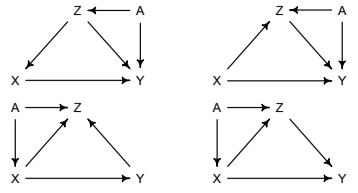

#### Answer
For each plot, I'll list the paths from X to Y, describe if it
> **Top Left:**

| Path             | Type       | Status     | Action       | Condition On |
| ---------------- | ---------- | ---------- | ------------ | ------------ |
| X -> Y           | Causal     | Open       | Leave Open   | NA           |
| X <- Z -> Y      | Non-Causal | Open       | Close        | Z            |
| X <- Z <- A -> Y | Non-Causal | Open   | Close        | Z or A       |
| ---------------- | ---------- | ---------- | ------------ | ------------ |
|                  |            |            |              | **Z**        |

> > > $\hat{y}_i = \alpha + \beta_X x_i + \beta_Z z_i$

> **Top Right:**

| Path             | Type       | Status     | Action       | Condition On |
| ---------------- | ---------- | ---------- | ------------ | ------------ |
| X -> Y           | Causal     | Open       | Leave Open   | NA           |
| X -> Z -> Y      | Causal     | Open       | Leave Open   | none         |
| X -> Z <- A -> Y | Non-Causal | Closed (Z) | Leave Closed | none         |
| ---------------- | ---------- | ---------- | ------------ | ------------ |
|                  |            |            |              | **None**     |

> > > $\hat{y}_i = \alpha + \beta_X x_i$

> **Bottom Left:**

| Path             | Type       | Status     | Action       | Condition On |
| ---------------- | ---------- | ---------- | ------------ | ------------ |
| X -> Y           | Causal     | Open       | Leave Open   | NA           |
| X -> Z <- Y      | Non-Causal | Closed (Z) | Leave Closed | none         |
| X <- A -> Z <- Y | Non-Causal | Closed (Z) | Leave Closed | none         |
| ---------------- | ---------- | ---------- | ------------ | ------------ |
|                  |            |            |              | **None**     |

> > >$\hat{y}_i = \alpha + \beta_X x_i$

> **Bottom Right:**

| Path             | Type       | Status     | Action       | Condition On |
| ---------------- | ---------- | ---------- | ------------ | ------------ |
| X -> Y           | Causal     | Open       | Leave Open   | NA           |
| X -> Z -> Y      | Causal     | Open       | Leave Open   | none         |
| X <- A -> Z -> Y | Non-Causal | Open       | Close        | A            |
| ---------------- | ---------- | ---------- | ------------ | ------------ |
|                  |            |            |              | **A**        |

> > > $\hat{y}_i = \alpha + \beta_X x_i + \beta_A a_i$

## Hard

### 6H1
#### Question
Use the Waffle House data, `data(WaffleDivorce)`, to find the total causal influence of number of Waffle Houses on divorce rate. Justify your model or models with a causal graph.

#### Answer
Let's first load the data.

In [ ]:
data(WaffleDivorce)
d <- WaffleDivorce

I'm not sure, but I think this question is asking to answer as though `WaffleHouses` is truly a cause of `Divorce`.  I wouldn't imagine that this is actually the case, but let's say that we hypothesize the following DAG.

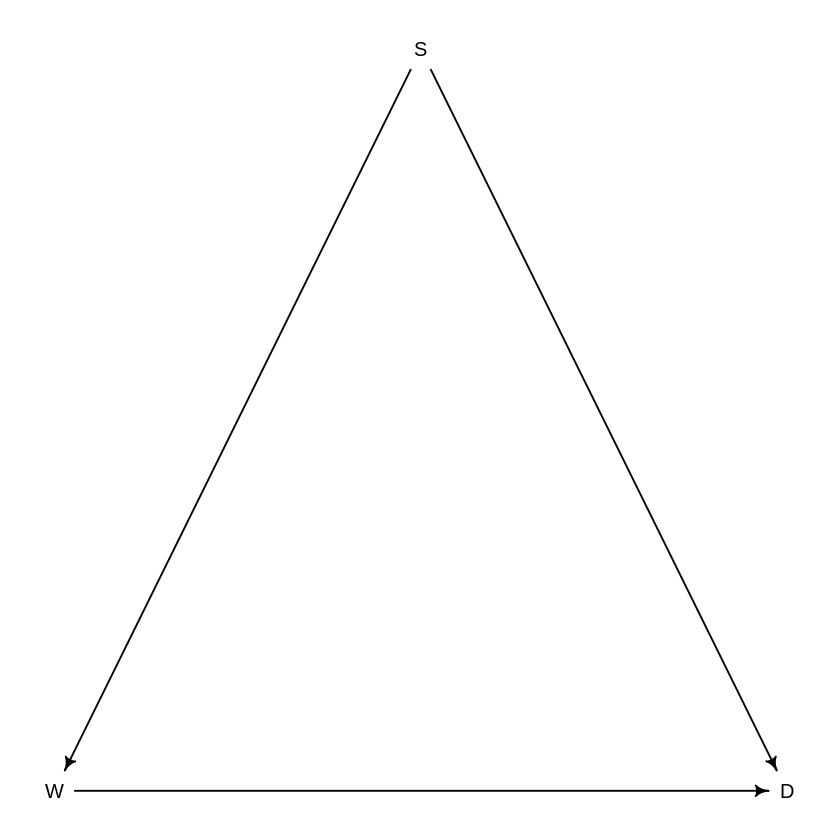

In [ ]:
library(dagitty)

WD_DAG <- dagitty("dag{W <- S -> D;
                       W -> D}")
coordinates(WD_DAG) <- list(x=c(W=1, S=2, D=3),
                            y=c(W=1, S=0, D=1))
drawdag(WD_DAG)

`South`erness S causes both `WaffleHouses` W and `Divorce` D, and `WaffleHouses` W cause `Divorce` D.

In this case, to get an estimate of the effect of W on D, we need to regress `Divorce` on both `WaffleHouses` and `South`.  We can get this from the `dagitty` package.

In [ ]:
adjustmentSets(WD_DAG, exposure="W", outcome="D")

{ S }

Let's actually run this regression.  I'll use the Frequentist-based `lm()` funciton in `R` just for variety.

In [ ]:
WD_reg <- lm(Divorce ~ WaffleHouses + South, data=d)
summary(WD_reg)


Call:
lm(formula = Divorce ~ WaffleHouses + South, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1959 -1.2959  0.1246  0.9791  3.7041 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.2958758  0.2916480  31.874   <2e-16 ***
WaffleHouses 0.0009222  0.0052066   0.177   0.8602    
South        1.2939325  0.7552357   1.713   0.0933 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.744 on 47 degrees of freedom
Multiple R-squared:  0.1197,	Adjusted R-squared:  0.08228 
F-statistic: 3.196 on 2 and 47 DF,  p-value: 0.04994


As expected, the `Estimate` and `p.value` for `WaffleHouses` does not provide much evidence for any effect of `WaffleHouses` on `Divorce`--given the assumptions of the DAG.

### 6H2
#### Question
Build a series of models to test the implied conditional independencies of the causal graph you used in the previous problem. If any of the tests fail, how do you think the graph needs to be amended? Does the graph need more or fewer arrows? Feel free to nominate variables that aren’t in  the data.

#### Answer
Make sure that you've ran the `dagitty` code from question 6H1.  We're asked now to test the validity of this DAG.

One way to run these tests is to look for `impliedConditionalIndependencies` of the DAG.  Remember, `impliedConditionalIndependencies` are two variables that are dependent but become independent after conditioning on some other (set of) variable(s).  Your DAG may have some of these `impliedConditionalIndependencies`, but unfortunately for me, there are none.  All variables are directly linked; no conditioning renders any pair independent.  We can check this in `dagitty`.

In [ ]:
impliedConditionalIndependencies(WD_DAG)

Nothing.

How else might we test the DAG.  One way could be test each relationship independently, and then in the context of the third omitted variable.

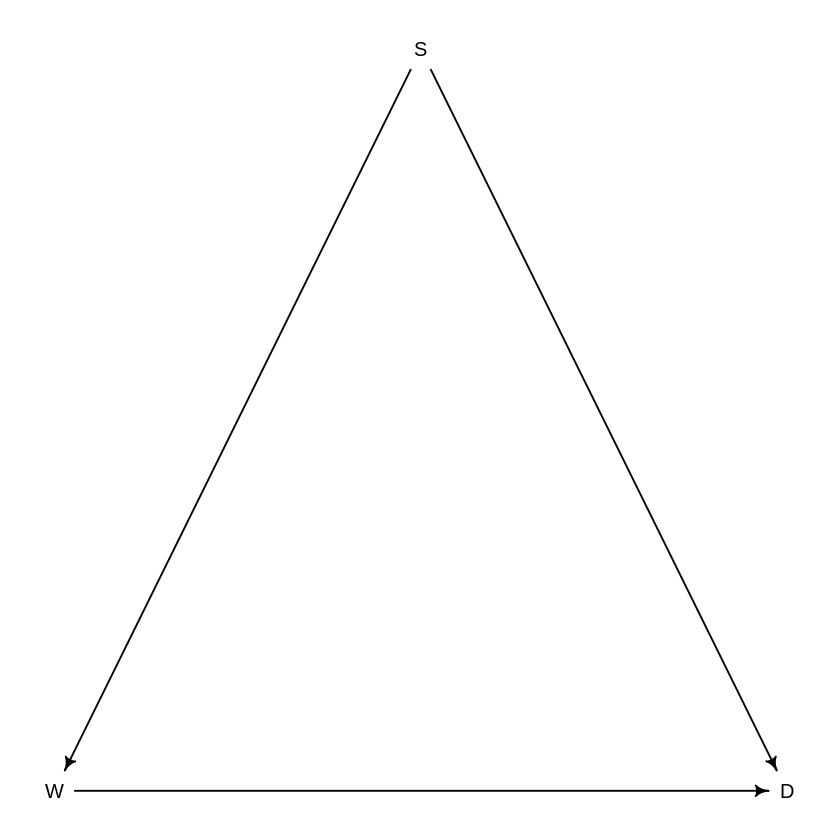

In [ ]:
drawdag(WD_DAG)

In [ ]:
WD_reg <- lm(Divorce ~ WaffleHouses, data=d)
SD_reg <- lm(Divorce ~ South, data=d)
SW_reg <- lm(WaffleHouses ~ South, data=d)

WSD_reg <- lm(Divorce ~ WaffleHouses + South, data=d)

Relation,Cond.Status,Estimate,p.value
<chr>,<chr>,<dbl>,<dbl>
W->D,Unconditional,0.0070,0.0745
,Conditional,0.0009,0.8602
S->D,Unconditional,1.3857,0.0000
,Conditional,1.2939,0.0933
S->W,Unconditional,99.5278,0.0000


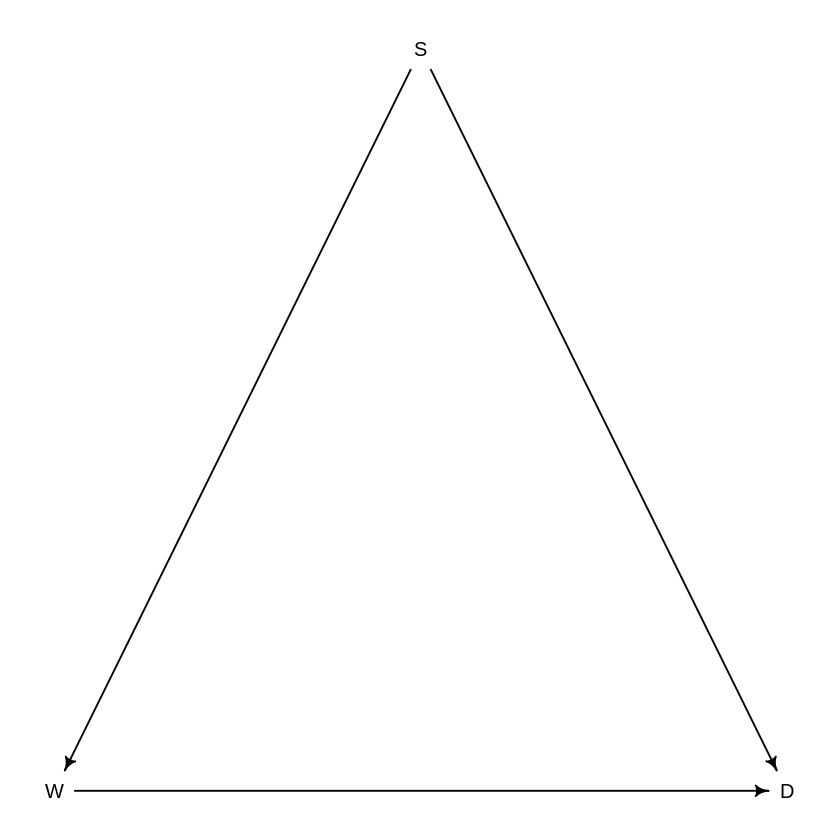

In [ ]:
data.frame("Relation" = c("W->D", "", "S->D", "", "S->W"),
           "Cond Status" = c("Unconditional", "Conditional", "Unconditional", "Conditional", "Unconditional"),
           "Estimate" = round(c(coef(WD_reg)[2], coef(WSD_reg)[2],
                                              coef(SD_reg)[2], coef(WSD_reg)[3],
                                              coef(SW_reg)[2]),
                                            4),
           "p.value" = round(c(summary(WD_reg)$coef[2,4], summary(WSD_reg)$coef[2,4],
                                             summary(SW_reg)$coef[2,4], summary(WSD_reg)$coef[3,4],
                                             summary(SW_reg)$coef[2,4]),
                                             4)
                                            )

drawdag(WD_DAG)

### 6H3-6H5
All three problems below are based on the same data. The data in `data(foxes)` are 116 foxes from 30 different urban groups in England. These foxes are like street gangs. `groupsize` varies from 2 to 8 individuals. Each group maintains its own urban territory. Some territories are larger than others.  The `area` variable encodes this information. Some territories also have more `avgfood` than others.  We want to model the `weight` of each fox. For the problems below, assume the following DAG:

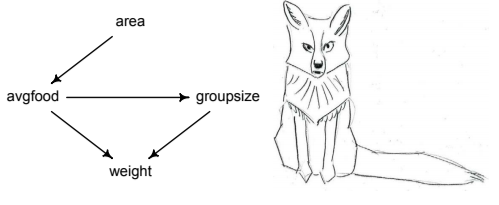

#### 6H3
##### Question
Use a model to infer the total causal influence of `area` on `weight`. Would increasing the `area` available to each fox increase `weight` (health)? You might want to standardize the variables. Regardless, use prior predictive simulation to show that your model’s prior predictions stay within the  possible outcome range.

##### Answer
I want to start by loading- and looking at the data.

In [3]:
data(foxes)
d <- foxes
?foxes
head(d, 10)

,group,avgfood,groupsize,area,weight
,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,0.37,2,1.09,5.02
2,1,0.37,2,1.09,2.84
3,2,0.53,2,2.05,5.33
4,2,0.53,2,2.05,6.07
5,3,0.49,2,2.12,5.85
6,3,0.49,2,2.12,3.25
7,4,0.45,2,1.29,4.53
8,4,0.45,2,1.29,4.09
9,5,0.74,3,3.78,6.13


Each fox has is represented in a single row.  Foxes of the same `group` have duplicated values for `avgfood`, `groupsize`, and `area`.

Next, let's standardize the numerical variables.

In [4]:
d$F <- standardize(d$avgfood)
d$S <- standardize(d$groupsize)
d$A <- standardize(d$area)
d$W <- standardize(d$weight)

Now we need to build a model.  We need to check for the total effect of `area` on `weight`, assuming the DAG above is correct.  There are 2 paths from `area` to `weight`:

>   $area \rightarrow avgfood \rightarrow weight$

>   $area \rightarrow avgfood \rightarrow groupsize \rightarrow weight$

Both of these paths are causal.  Therefore, we do not want to condition on anything other than `area`.  So our linear model will look like:

> $\hat{W} = \alpha + \beta_A A$

We can check this with the `dagitty` package.



 {}

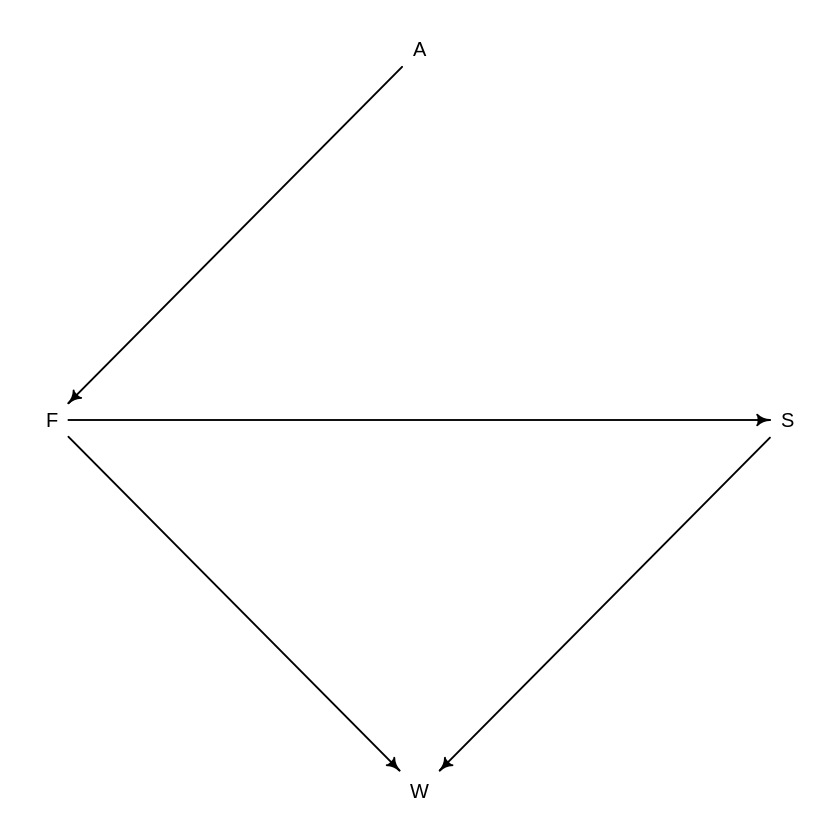

In [5]:
library(dagitty)

foxDAG <- dagitty("dag{A -> F;
                       W <- F -> S -> W}")
coordinates(foxDAG) <- list(x=c(A=2, F=1, S=3, W=2),
                            y=c(A=1, F=2, S=2, W=3))
drawdag(foxDAG)

adjustmentSets(foxDAG, exposure="A", outcome="W")

Just as we concluded, no `adjustmentSets`.

The question suggests we use prior-predictive checks to make sure our priors are sensible.  The rethinking package has a useful command for this called `extract.prior`.  But we need to build the model before using it.  In the meantime, I'll use the priors for standardized variables that have been demonstrated in the book.

In [6]:
m <- quap(
  alist(
    W ~ dnorm(mu, sigma),
      mu <- a + bA*A,
        a ~ dnorm(0, 0.2),
        bA ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

Before looking at the output, I'm going to do my prior predictive check.  This is a goood idea to help prevent tampering with the priors in the case of finding an output that doesn't fit a pet hypothesis.

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.19,-0.30,0.30
bA,-0.01,0.48,-0.80,0.75
sigma,1.01,1.04,0.06,2.88


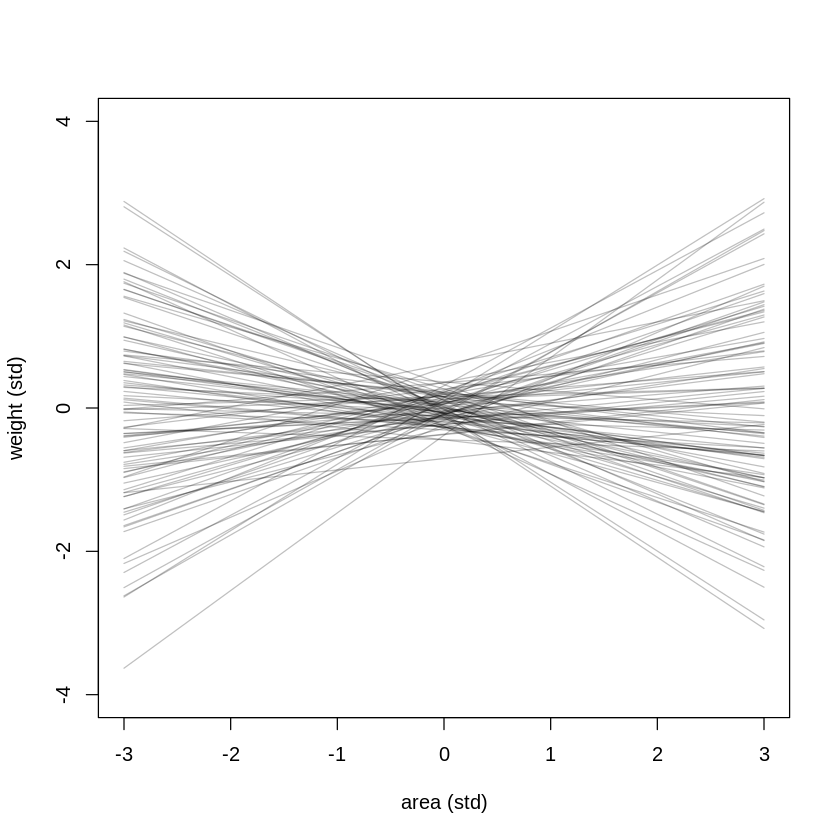

In [7]:
prior <- extract.prior(m)

A_seq <- seq(from=-3, to=3, length.out=100)
W_mu_prior <- link(m, post=prior, data=list("A"=A_seq))

plot(NULL, xlim=c(-3,3), ylim=c(-4,4), ylab="weight (std)", xlab="area (std)")
for(i in 1:100){
  lines(A_seq, W_mu_prior[i,], col=col.alpha("black", 0.25))
}

round(precis(prior, hist=FALSE),2)

The `bA` cofficient suggests that `weight` may change up or down by as much ~3/4 standard deviations with each standard-deviation change in `area`.  I don't have great intuitions here, and I'm not sure what a unit of `area` or `weight` is, but I'll assume `weight` is in kg.  A ~3/4 standard deviation in `weight` means that extreme changes in `weight` with an extreme of area (3 standard deviations) is about `0.78*sd(d$weight)*3` = ~ 2.8 kg.  I can buy that.

So now let's look at the posterior.

In [8]:
round(precis(m),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.13,0.13
bA,0.02,0.09,-0.13,0.16
sigma,0.99,0.06,0.89,1.09


The `bA` coefficient suggests, with its near-zero value and zero-enveloping credibility interval, that `area` does not have a meaningful impact on `weight`.

#### 6H4
##### Question
Now infer the causal impact of adding food to a territory. Would this make foxes heavier?  Which covariates do you need to adjust for to estimate the total causal influence of food?

##### Answer
We apparently need to include `avgfood` (or `F`, in our standardized model) to the regression.  In our DAG, `avgfood`, or `F`, is mediator between our previous explanatory variable, `area` or `A`, and the rest of the DAG.  Thus, assuming our DAG is acurate, we can drop A and insert F to the regression.

In [9]:
m2 <- quap(
  alist(
    W ~ dnorm(mu, sigma),
      mu <- a + bF*F,
        a ~ dnorm(0, 0.2),
        bF ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.13,0.13
bF,-0.02,0.09,-0.17,0.12
sigma,0.99,0.06,0.89,1.09


We could run another prior predictive check, but the results will be the same since we're again using standardized variables and our explanatory variable affects the outcome only via causal paths.  So let's look at the posterior.

In [10]:
round(precis(m2), 2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.08,-0.13,0.13
bF,-0.02,0.09,-0.17,0.12
sigma,0.99,0.06,0.89,1.09


Once again, not much evidence that `avgfood` is affecting `weight`.